# TP3 - Baptiste GESLIN

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from numpy.linalg import matrix_rank
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPRegressor

### On utilisera IPython Notebook pour réaliser ce TP. On déposera son compte-rendu sur le site pédagogique avant le 22 novembre, 23h59. Nous travaillons sur la base de données diabetes de python. La base initiale comporte n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n = 442 patients et p = 210 covariables, notés X. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

### Q1 : Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [3]:
data= pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", ",", header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [4]:
print(data.shape)

(442, 211)


### Q2 : Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [6]:
# colonnes avec moyenne != 0
mean=pd.DataFrame(np.abs(data.mean()))
mean_not_zero = mean.loc[mean[0]>10**-10]
print("Colonnes avec une moyenne différente de 0 => ", mean_not_zero)

# Colonnes avec std != 1
std=pd.DataFrame(data.std())
std_not_one = std.loc[np.abs(std[0]-1)>10**-2]
print("Colonnes avec une variance différente de 1 => : ", std_not_one)

Colonnes avec une moyenne différente de 0 =>                0
210  152.133484
Colonnes avec une variance différente de 1 => :               0
210  77.093005


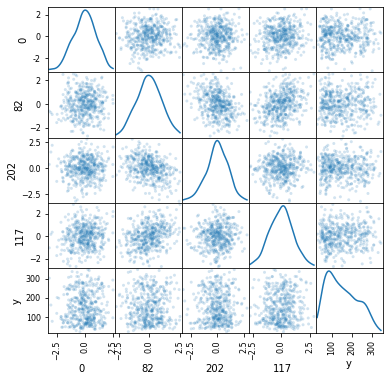

In [7]:
# Création dataframe X et y
X = data.drop([210], 1)
y = data[210]

# Sélection random des variables explicatives
X_rand= X.sample(4, axis=1)
X_rand["y"]= y

# Affichage scatter_plot
scatter_matrix(X_rand, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

### Q3 : Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain, un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [8]:
#split the data into training et testing sets

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 210)
(89, 210)
(353,)
(89,)


### Q4 : Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

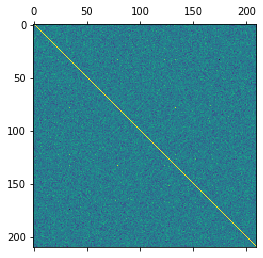

In [9]:
plt.matshow(X.corr())
plt.show()

[ 5.39422863e+00  4.74618878e+00  4.60460737e+00  4.54825735e+00
  4.50623990e+00  4.47046360e+00  4.44750752e+00  4.39838176e+00
  4.38018002e+00  4.36368385e+00  4.34867921e+00  4.29734992e+00
  4.28977580e+00  4.26295438e+00  4.23468880e+00  4.20762974e+00
  4.18569519e+00  4.15357968e+00  4.13910361e+00  4.12340483e+00
  4.10496393e+00  4.08622908e+00  4.06862642e+00  4.05288811e+00
  4.03154283e+00  4.02028459e+00  4.01381701e+00  3.99809762e+00
  3.96882727e+00  3.92486833e+00  3.92263528e+00  3.91401907e+00
  3.88934424e+00  3.85570137e+00  3.84260518e+00  3.82963018e+00
  3.81834738e+00  3.78801536e+00  3.77137575e+00  3.75035020e+00
  3.72461105e+00  3.71420774e+00  3.69309445e+00  3.63982589e+00
  3.61592349e+00  3.59604058e+00  3.54469163e+00  3.52432593e+00
  3.47604268e+00  3.27789797e+00  2.76726786e+00  1.28199773e+00
  9.93872899e-01  8.53761061e-01  5.85228948e-01  5.24964822e-01
  4.56779202e-01  3.75214483e-01  6.77031408e-02  7.96972312e-03
  2.30455615e-15  1.90901

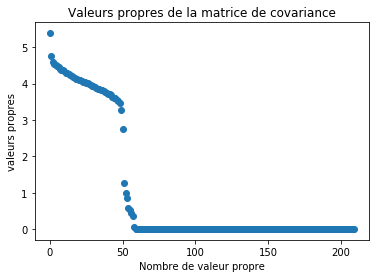

In [10]:
# Valeurs propres et vecteurs propres de la matrice de covariance.
eigen_values, eigen_vectors= np.linalg.eigh(X.cov())
eigen_values_sorted = np.sort(eigen_values)[::-1]
eigen_vectors_sorted = np.sort(eigen_vectors)[::-1]
print(eigen_values_sorted)

# Affichage des valeurs propres
plt.scatter(np.arange(len(eigen_values_sorted)),eigen_values_sorted)
plt.xlabel("Nombre de valeur propre")
plt.ylabel("valeurs propres")
plt.title("Valeurs propres de la matrice de covariance")
plt.show()

In [11]:
rang_X = np.linalg.matrix_rank(X)
print("Le rang de la matrice est : ", rang_X)

Le rang de la matrice est :  60


### Q5 : Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [12]:
# Compute X_train_pca
X_train_pca = X_train @ eigen_vectors_sorted[:,0:60]
print("X_pca shape : ",X_train_pca.shape)

# Réalisation d'une regression linéaire avec intercept
reg_pca = LinearRegression(fit_intercept = True).fit(X_train_pca,y_train)
                                                     
# Réalisation d'une regression linéaire avec intercept
reg = LinearRegression(fit_intercept = True).fit(X_train,y_train)

X_pca shape :  (353, 60)


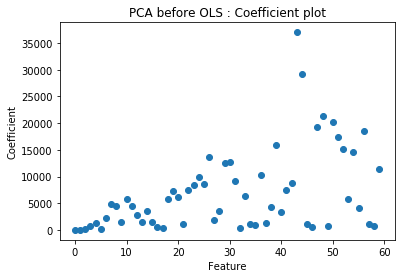

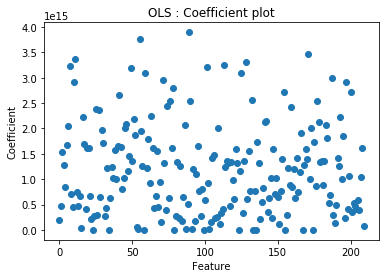

In [13]:
# Affichage avec PCA
plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("PCA before OLS : Coefficient plot")
plt.scatter(np.arange(0,reg_pca.coef_.shape[0]),np.abs(reg_pca.coef_))
plt.show()

# Affichage sans PCA
plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("OLS : Coefficient plot")
plt.scatter(np.arange(0,reg.coef_.shape[0]),np.abs(reg.coef_))
plt.show()

### Q6 :  Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.

In [14]:
print("Intercept de la regression sans PCA : ", reg.intercept_)
print("Intercept de la regression sans PCA : ", reg_pca.intercept_)
print("Moyenne label : ", y_train.mean())

Intercept de la regression sans PCA :  150.50601983002832
Intercept de la regression sans PCA :  150.8240969387241
Moyenne label :  150.88101983002832


In [15]:
# On centre et réduit les variables après PCA
scaler = StandardScaler().fit(X_train_pca)
X_pca_std = scaler.transform(X_train_pca)

# regression avec PCA et normalization
reg_pca_normalized = LinearRegression(fit_intercept = True).fit(X_pca_std, y_train)

print("Intercept de la regression avec PCA et normalization : ", reg_pca_normalized.intercept_)
print("Moyenne label : ", y_train.mean())

Intercept de la regression avec PCA et normalization :  150.88101983003185
Moyenne label :  150.88101983002832


### Q7 : Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

(89, 210)
(89,)


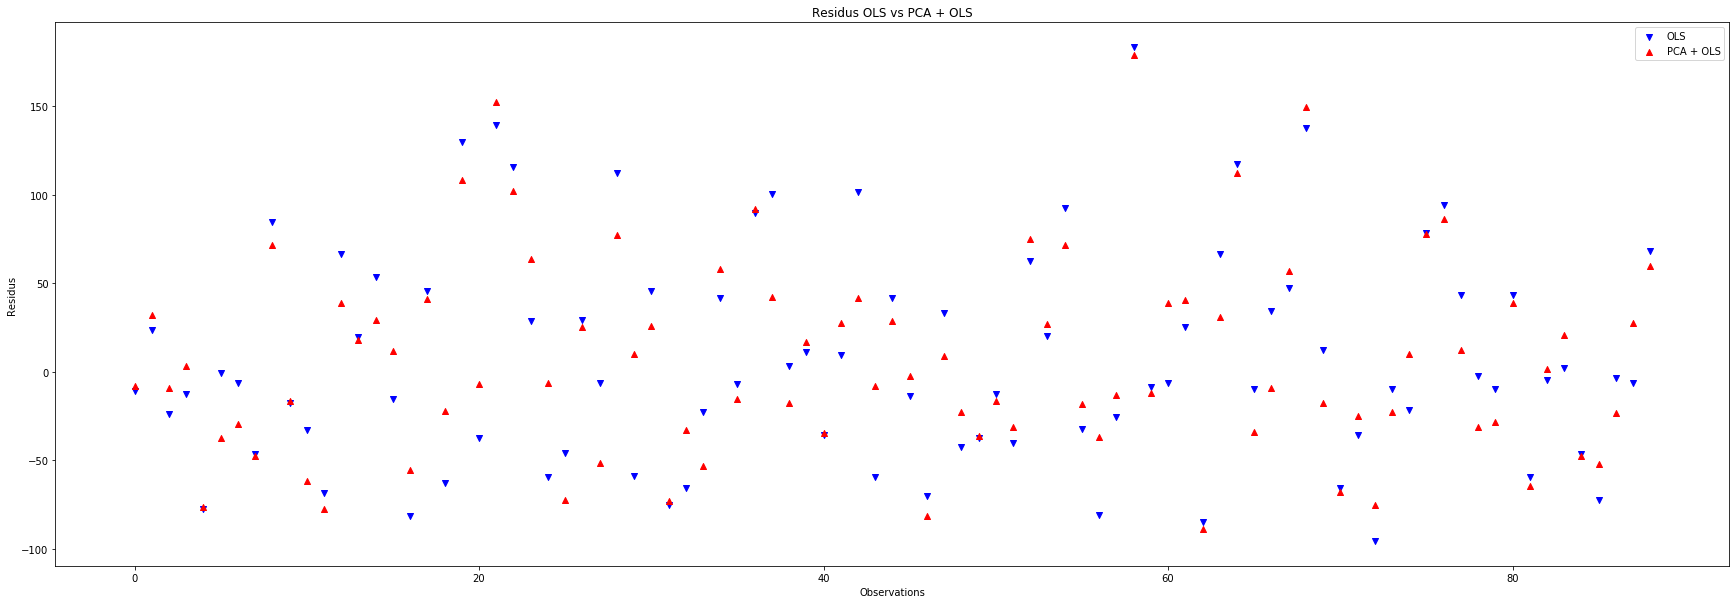

In [16]:
# Compute X_test_pca
X_test_pca = X_test @ eigen_vectors_sorted[:,0:60]

print(X_test.shape)
print(y_test.shape)

# Calcul des residus sur l'échantillon de test pour chaques méthodes.
OLS_residus = y_test - reg.predict(X_test)
PCA_residus = y_test - reg_pca.predict(X_test_pca)

plt.figure(figsize=(30,10))

#plot des résidus issus de la regression OLS
plt.scatter(np.arange(0,y_test.shape[0]) ,OLS_residus,marker='v',c="blue",label='OLS')

#plot des résidus issus de la regression PCA + OLS
plt.scatter(np.arange(0,y_test.shape[0]) ,PCA_residus ,marker='^',c="red",label='PCA + OLS' )

# Affichage
plt.legend()
plt.xlabel("Observations")
plt.ylabel("Residus")
plt.title("Residus OLS vs PCA + OLS")
plt.show()

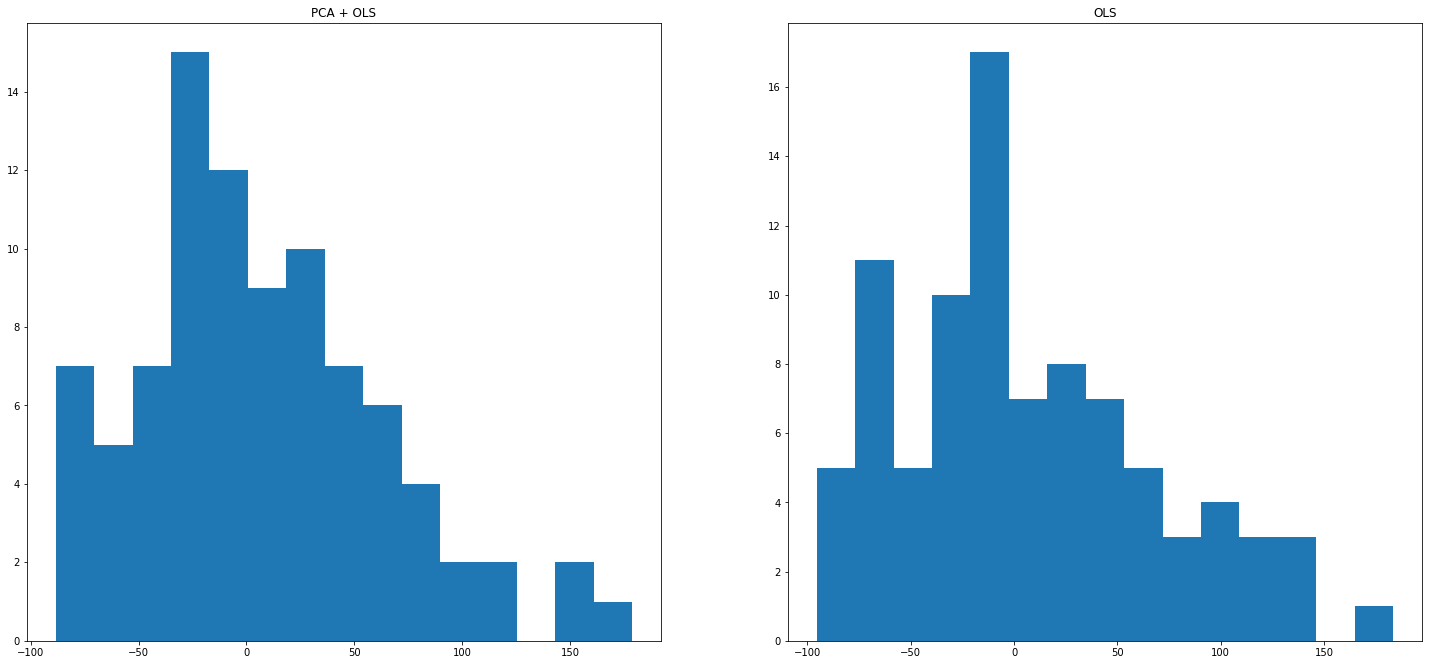

In [17]:
plt.figure(figsize=(25,25))
plt.subplot(221)
plt.title("PCA + OLS")
plt.hist(PCA_residus, bins=15)
plt.subplot(222)
plt.title("OLS")
plt.hist(OLS_residus, bins=15)
plt.show()

In [18]:
# Calcul du risque de prediction
print("Risque de prediction PCA + OLS => ", (pow(PCA_residus,2)).sum()/len(PCA_residus))
print("Risque de prediction OLS => ", (pow(OLS_residus,2)).sum()/len(PCA_residus))

Risque de prediction PCA + OLS =>  3119.4933747395075
Risque de prediction OLS =>  3726.6265755124728


### Q8 : Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [19]:
def forward_variable_selection(X, seuil = 1):

    p=X.shape[1]
    n=X.shape[0]
    residus = y_train
    test = np.zeros((p,p))
    pvalues = np.zeros(p)
    pval = np.zeros((p,p))
    variable = []
    variable_remaining = list(range(p))
    in_test = []
    
    for k in range(p): 
        residus_memory = np.zeros((p,n))
        #pour chaque variable explicative on fait une OLS en ajoutant l'intercept
        for i in variable_remaining:
            X_i=X[:, i ]

            # Regression linéaire sur chaque variable
            reg = LinearRegression(fit_intercept = False).fit(X_i.reshape(-1, 1),residus)
            #prediction
            y_pred = reg.predict(X_i.reshape(-1, 1))
            theta = reg.coef_
            
            # On stocke les residus obtenus
            residus_memory [i,:] = residus - y_pred
            
            # matrice de gram
            gram = X_i.T @ X_i
            # Calcul du rang
            rang = np.linalg.matrix_rank(gram)
            
            sigma2= 1/(n)*np.sum((residus - y_pred)**2)
            stdtheta=np.sqrt(sigma2/gram)
            
            # Calcul de la statistique de test : theta / std(theta)
            test[k,i] =  np.abs(theta) / stdtheta 
            # Calcul de la pvalue (la loi de student)
            pval[k,i] =   (1-t.cdf(np.abs(test[k,i]), n - rang))*2

        # On stocke la meilleur variable
        best_variable = np.argmax(test[k,:])
        variable.append(best_variable)
        
        # Mise à jour résidus pour la prochaine itération
        residus = residus_memory[best_variable,:]
        
        # Test afin de savoir si on est sous le seuil
        if pval[k,best_variable] > seuil:
            break
        pvalues [k] = pval[k,best_variable]
        variable_remaining = np.setdiff1d(variable_remaining,variable)
        
    return variable, test, pvalues

In [20]:
# Ajout intercept à X_train et X_test
X_train_I = sm.add_constant(X_train)
X_test_I = sm.add_constant(X_test)


variables_1, test_1, pvalues_1 = forward_variable_selection(X_train_I)
print("Ordre de sélection des variables : " , variables_1)

Ordre de sélection des variables :  [0, 59, 124, 118, 168, 134, 122, 130, 209, 160, 60, 35, 136, 203, 114, 86, 181, 210, 161, 195, 65, 175, 199, 112, 48, 104, 37, 106, 39, 69, 100, 36, 95, 80, 92, 24, 135, 201, 51, 184, 170, 154, 58, 205, 119, 131, 117, 180, 91, 155, 172, 108, 157, 143, 90, 41, 85, 15, 32, 83, 61, 120, 121, 64, 88, 191, 163, 111, 72, 62, 75, 174, 197, 56, 45, 27, 204, 176, 76, 55, 4, 207, 40, 31, 19, 33, 139, 5, 144, 57, 165, 63, 7, 115, 52, 29, 21, 84, 208, 152, 68, 127, 198, 43, 13, 99, 164, 98, 162, 146, 16, 169, 89, 102, 10, 129, 137, 71, 23, 149, 189, 145, 188, 11, 187, 202, 44, 9, 30, 14, 6, 78, 47, 178, 70, 116, 126, 20, 206, 17, 158, 147, 103, 87, 25, 3, 156, 26, 140, 128, 182, 101, 133, 8, 142, 192, 177, 167, 94, 38, 179, 190, 73, 159, 166, 123, 150, 18, 96, 49, 67, 200, 22, 12, 46, 81, 185, 113, 171, 193, 42, 173, 141, 54, 186, 125, 50, 194, 148, 79, 105, 2, 28, 138, 77, 53, 107, 74, 109, 97, 66, 82, 183, 196, 34, 151, 93, 132, 1, 110, 153]


### Q9 : Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

In [21]:
variables, test, pvalues = forward_variable_selection(X_train_I , 0.1)

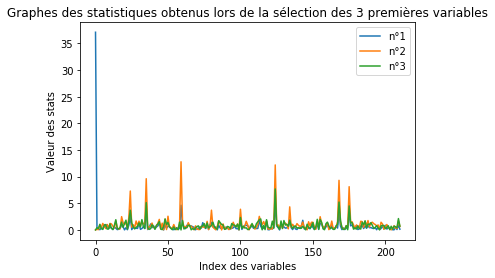

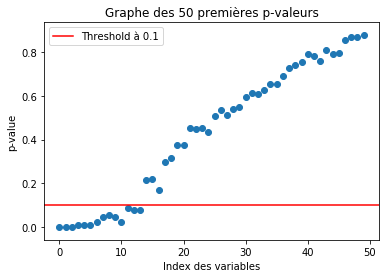

Variables selectionnées avec threshold égal à 0.1 =>  [0, 59, 124, 118, 168, 134, 122, 130, 209, 160, 60, 35, 136, 203, 114]


In [22]:
# Graphes des statistiques obtenus lors de la sélection des 3 premières variables
plt.plot(test[0], label="n°1")
plt.plot(test[1],label="n°2")
plt.plot(test[2],label="n°3")
plt.legend()
plt.xlabel("Index des variables")
plt.ylabel("Valeur des stats")
plt.title("Graphes des statistiques obtenus lors de la sélection des 3 premières variables")
plt.show()

# Graphe des 50 premières p-valeurs
plt.scatter(range(0,50),pvalues_1[0:50])
plt.xlabel("Index des variables")
plt.ylabel("p-value")
plt.title("Graphe des 50 premières p-valeurs")
plt.axhline(y=0.1, color='r', linestyle='-',label="Threshold à 0.1")
plt.legend()
plt.show()

# Affichage des variables selectionnées avec threshold = 0.1
print("Variables selectionnées avec threshold égal à 0.1 => ",variables)

### Q10 : Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS

In [23]:
#On construit les nouveaux X_train_fwd et X_test_fwd X à partir des variables sélectionnées
X_train_fwd = X_train_I[:, variables]
X_test_fwd = X_test_I[:, variables]

# Réalisation d'une regression linéaire avec intercept
reg = LinearRegression(fit_intercept = True).fit(X_train_fwd,y_train)
predictions = reg.predict(X_test_fwd)
forward_residus = y_test - predictions

# Calcul du risque de prediction
print("Risque de prediction PCA + OLS => ", (pow(PCA_residus,2)).sum()/len(PCA_residus))
print("Risque de prediction OLS => ", (pow(OLS_residus,2)).sum()/len(OLS_residus))
print("Risque de prediction Forward => ", (pow(forward_residus,2)).sum()/len(forward_residus))

Risque de prediction PCA + OLS =>  3119.4933747395075
Risque de prediction OLS =>  3726.6265755124728
Risque de prediction Forward =>  3084.3773909395054


### Q11 : Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [24]:
kfold = KFold(n_splits=4, shuffle=True)
index_train= []
index_test= []

for train_index, test_index in kfold.split(data):
    index_train.append(train_index)
    index_test.append(test_index)
    
for i in range(len(index_train)):
    print("Indices train de l'échantillon " + str(i) + " : " )
    print(index_train[i])
    print("Indices test de l'échantillon " + str(i) + " : ")
    print(index_test[i])


Indices train de l'échantillon 0 : 
[  1   3   5   6   7  10  11  13  14  16  17  18  19  22  23  24  26  27
  30  31  32  34  35  36  37  38  42  43  44  47  49  51  52  53  54  56
  57  60  61  62  63  65  66  68  69  70  71  72  73  74  75  76  77  78
  80  81  82  84  86  87  88  90  93  95  97 100 101 102 103 104 105 107
 108 110 114 117 119 120 121 123 125 126 127 128 129 130 132 133 135 136
 137 138 139 140 141 144 145 146 147 148 149 150 152 153 154 155 156 157
 158 159 160 161 163 164 165 166 167 168 169 170 171 172 173 175 176 177
 178 179 180 181 182 183 184 186 187 188 189 190 191 193 194 195 196 197
 198 199 200 202 204 205 207 208 209 210 211 212 213 214 215 216 218 219
 221 222 224 225 226 227 230 231 232 233 234 236 237 238 239 241 244 245
 246 247 248 249 250 251 252 253 254 255 256 259 260 261 262 264 265 266
 267 268 269 270 272 273 274 275 276 277 278 279 280 282 285 286 288 289
 290 291 292 294 296 297 299 300 301 302 303 304 307 308 309 310 311 312
 314 316 317 31

### Q12 : Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

Les lambdas à évaluer sont =>  [11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]

Le risque de prédiction minimum est  3620.0793116238074  avec lambda égal à  79


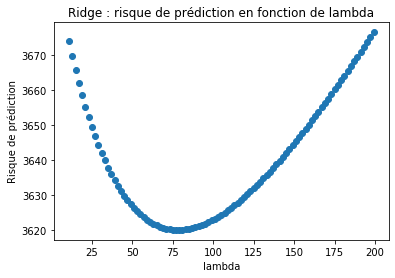

In [25]:
lambdas=[2*x +1 for x in range(5,100)]
print("Les lambdas à évaluer sont => ", lambdas)

# variable pour stocker les erreurs de prédictions moyennes pour chaque lambda
risque_memory = np.zeros(len(lambdas))

for i in range(len(lambdas)):
    # variable pour stocker les erreurs de prédictions pour chaque fold
    risque_pred = np.zeros(len(index_train))
    for j in range(len(index_train)):
        X_train_temp = data.iloc[index_train[j],:].drop([210], 1)
        y_train_temp = data.iloc[index_train[j],210]
        X_test_temp = data.iloc[index_test[j],:].drop([210], 1)
        y_test_temp = data.iloc[index_test[j],210]
        
        # Regression Ridge
        reg_ridge = Ridge(alpha = lambdas[i]).fit(X_train_temp,y_train_temp)
        predictions = reg_ridge.predict(X_test_temp)
        residus = y_test_temp - predictions
        risque_pred[j] = ((pow(residus,2)).sum()/len(residus))
     
    # On prend le risque predictif moyen
    risque_memory[i] = risque_pred.mean()

print("\nLe risque de prédiction minimum est ",risque_memory.min()," avec lambda égal à ", lambdas[np.where(risque_memory == risque_memory.min())[0][0]])  
        
# Affichage avec PCA
plt.figure()
plt.xlabel("lambda")
plt.ylabel("Risque de prédiction")
plt.title("Ridge : risque de prédiction en fonction de lambda")
plt.scatter(lambdas,risque_memory)
plt.show()       
        

### Q13 : A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

In [26]:
# Regularisation Lasso
lassoCV = LassoCV(fit_intercept=True).fit(X_train,y_train)
print("Paramètre de régularisation Lasso : ",lassoCV.alpha_,"\n")
predictions = lassoCV.predict(X_test)
lasso_residus = y_test - predictions


# Calcul du risque de prediction
print("Risque de prediction PCA + OLS => ", (pow(PCA_residus,2)).sum()/len(PCA_residus))
print("Risque de prediction OLS => ", (pow(OLS_residus,2)).sum()/len(OLS_residus))
print("Risque de prediction Forward => ", (pow(forward_residus,2)).sum()/len(forward_residus))
print("Risque de prediction Lasso => ", (pow(lasso_residus,2)).sum()/len(lasso_residus))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Paramètre de régularisation Lasso :  6.913497923629846 

Risque de prediction PCA + OLS =>  3119.4933747395075
Risque de prediction OLS =>  3726.6265755124728
Risque de prediction Forward =>  3084.3773909395054
Risque de prediction Lasso =>  2934.3468117467773


### Q14 : Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [27]:
index_variable_lasso = np.nonzero(lassoCV.coef_)
print(index_variable_lasso)
print("Nous avons "+str(len(index_variable_lasso[0]))+" coefficients non nuls")

(array([ 58, 117, 123, 129, 154, 167, 174], dtype=int64),)
Nous avons 7 coefficients non nuls


In [28]:
#On construit les nouveaux X_train_fwd et X_test_fwd X à partir des variables sélectionnées
X_train_lasso = X_train[:, index_variable_lasso[0]]
X_test_lasso = X_test[:, index_variable_lasso[0]]

print(X_train.shape)

# Réalisation d'une regression linéaire avec intercept
reg_lasso = LinearRegression(fit_intercept = True).fit(X_train_lasso,y_train)
predictions = reg_lasso.predict(X_test_lasso)
least_square_lasso_residus = y_test - predictions

# Calcul du risque de prediction
print("Risque de prediction PCA + OLS => ", (pow(PCA_residus,2)).sum()/len(PCA_residus))
print("Risque de prediction OLS => ", (pow(OLS_residus,2)).sum()/len(OLS_residus))
print("Risque de prediction Forward => ", (pow(forward_residus,2)).sum()/len(forward_residus))
print("Risque de prediction Lasso => ", (pow(lasso_residus,2)).sum()/len(lasso_residus))
print("Risque de prediction Least Square Lasso => ", (pow(least_square_lasso_residus,2)).sum()/len(least_square_lasso_residus))

(353, 210)
Risque de prediction PCA + OLS =>  3119.4933747395075
Risque de prediction OLS =>  3726.6265755124728
Risque de prediction Forward =>  3084.3773909395054
Risque de prediction Lasso =>  2934.3468117467773
Risque de prediction Least Square Lasso =>  2955.9341598080605


### Q15 : Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

In [29]:
# On utilise les variables selectionnées par lasso avec un le mlp_regressor de sklearn.

# On réalise une validation croisée sur le paramètre du nombre de hidden layer et de neurones par layer.
layers=[(5,),(10,),(5,5),(10,10),(15,5),(5,15),(20,20),(20,),(2,2),(1,1),(3,),(7,),(15,)]
print("Les paramètres à tester (nombre de hidden layer et de neurones par layer) pendant la cross validation", layers)



# variable pour stocker les erreurs de prédictions moyennes pour chaque paramètre
risque_memory = np.zeros(len(layers))

for i in range(len(layers)):
    # variable pour stocker les erreurs de prédictions pour chaque fold
    risque_pred = np.zeros(len(index_train))
    for j in range(len(index_train)):
        X_train_temp = data.drop([210], 1).iloc[index_train[j],index_variable_lasso[0]]
        y_train_temp = data.iloc[index_train[j],210]
        X_test_temp = data.drop([210], 1).iloc[index_test[j],index_variable_lasso[0]]
        y_test_temp = data.iloc[index_test[j],210]
        
        # Regression mlp_regressor
        mlp_regressor = MLPRegressor(hidden_layer_sizes=layers[i], activation="relu", solver="sgd"
                             , alpha=0.0001, learning_rate="constant"
                             , max_iter=500, shuffle=True
                             , validation_fraction=0.1).fit(X_train_temp,y_train_temp)
        predictions = mlp_regressor.predict(X_test_temp)
        residus = y_test_temp - predictions
        risque_pred[j] = ((pow(residus,2)).sum()/len(residus))
    
    # On prend le risque predictif moyen
    risque_memory[i] = risque_pred.mean()
    
print("\nLe risque de prédiction minimum est ",risque_memory.min()," avec un layer égal à ", layers[np.where(risque_memory == risque_memory.min())[0][0]]) 
print("\nRisque de prediction PCA + OLS => ", (pow(PCA_residus,2)).sum()/len(PCA_residus))
print("Risque de prediction OLS => ", (pow(OLS_residus,2)).sum()/len(OLS_residus))
print("Risque de prediction Forward => ", (pow(forward_residus,2)).sum()/len(forward_residus))
print("Risque de prediction Lasso => ", (pow(lasso_residus,2)).sum()/len(lasso_residus))
print("Risque de prediction Least Square Lasso => ", (pow(least_square_lasso_residus,2)).sum()/len(least_square_lasso_residus))
print("Risque de prediction mlp_regressor => ", risque_memory.min())

Les paramètres à tester (nombre de hidden layer et de neurones par layer) pendant la cross validation [(5,), (10,), (5, 5), (10, 10), (15, 5), (5, 15), (20, 20), (20,), (2, 2), (1, 1), (3,), (7,), (15,)]

Le risque de prédiction minimum est  3037.7642725106766  avec un layer égal à  (3,)

Risque de prediction PCA + OLS =>  3119.4933747395075
Risque de prediction OLS =>  3726.6265755124728
Risque de prediction Forward =>  3084.3773909395054
Risque de prediction Lasso =>  2934.3468117467773
Risque de prediction Least Square Lasso =>  2955.9341598080605
Risque de prediction mlp_regressor =>  3037.7642725106766
